In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re

In [2]:
train_data_path = '/Users/maegbug/competetion_data/titanic/train.csv'
test_data_path = '/Users/maegbug/competetion_data/titanic/test.csv'
titanic_train = pd.read_csv(train_data_path)
titanic_test = pd.read_csv(test_data_path)
print(titanic_train.shape)
print(titanic_test.shape)
titanic_train.tail()

(891, 12)
(418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
titanic_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


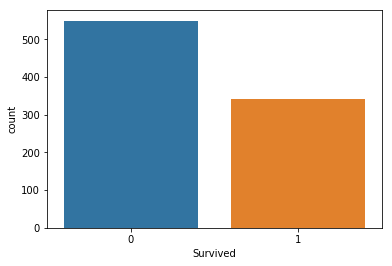

In [4]:
sns.countplot(titanic_train['Survived'])

In [5]:
#Get overview of missing values

def missing_value_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : "Missing Values", 1 : "% of Total Values"})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    "% of Total Values", ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) + 
          " columns that have missing values.")
    return mis_val_table_ren_columns

In [6]:
missing_value_table(titanic_train)

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [7]:
print(titanic_train.dtypes)
print(titanic_train.dtypes.value_counts())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
object     5
int64      5
float64    2
dtype: int64


In [8]:
#Looking at number of unique classes in each object column
titanic_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [9]:
le = LabelEncoder()
le_count = 0

for col in titanic_train:
    if titanic_train[col].dtype == 'object':
        if len(list(titanic_train[col].unique())) <= 2:
            le.fit(titanic_train[col])
            titanic_train[col] = le.transform(titanic_train[col])
            titanic_test[col] = le.transform(titanic_test[col])
            le_count += 1
print('%d coumns were label encoded.' % le_count)

1 coumns were label encoded.


In [10]:
titanic_train = pd.get_dummies(titanic_train)
titanic_test = pd.get_dummies(titanic_test)

print("Training Features shape: " + str(titanic_train.shape))
print("Testing Features shape: " + str(titanic_test.shape))

Training Features shape: (891, 1730)
Testing Features shape: (418, 867)


In [11]:
train_labels = titanic_train['Survived']

titanic_train, titanic_test = titanic_train.align(titanic_test, join ='inner', axis=1)

titanic_train['Survived'] = train_labels

print("Training Features shape: ", str(titanic_train.shape))
print("testing Features shape: ", str(titanic_test.shape))

Training Features shape:  (891, 165)
testing Features shape:  (418, 164)


In [12]:
titanic_train.select_dtypes(['int', 'float']).describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


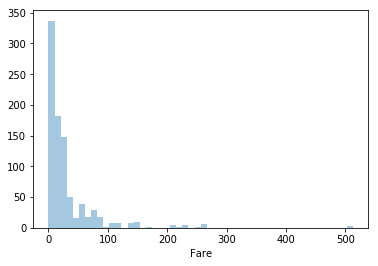

In [13]:
sns.distplot(titanic_train['Fare'], kde = False)

Text(0.5,0,'Fare')

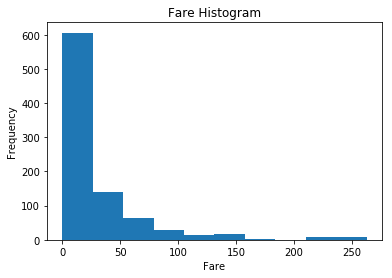

In [14]:
titanic_train["abnormal_fare"] = titanic_train["Fare"] > 500
titanic_train.loc[titanic_train.Fare > 500, "Fare"] = np.nan
titanic_train["Fare"].plot.hist(title = "Fare Histogram");
plt.xlabel("Fare")

Text(0.5,0,'Fare')

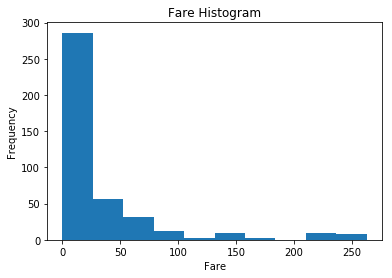

In [15]:
titanic_test["abnormal_fare"] = titanic_test["Fare"] > 500
titanic_test.loc[titanic_test.Fare > 500, "Fare"] = np.nan
titanic_test["Fare"].plot.hist(title = "Fare Histogram");
plt.xlabel("Fare")

In [16]:
corr = titanic_train.corr()["Survived"].sort_values()

print("Most Positive Correlations : \n", corr.tail(15))
print("Most Negative Correlations : \n", corr.head(15))

Most Positive Correlations : 
 Ticket_230136      0.060095
Ticket_2668        0.060095
Ticket_248738      0.060095
Ticket_2661        0.060095
Ticket_PC 17569    0.060095
Ticket_PP 9549     0.060095
Ticket_1601        0.060465
Cabin_F33          0.073642
Ticket_24160       0.073642
Ticket_PC 17755    0.073642
abnormal_fare      0.073642
Parch              0.081629
Embarked_C         0.168240
Fare               0.261742
Survived           1.000000
Name: Survived, dtype: float64
Most Negative Correlations : 
 Sex                   -0.543351
Pclass                -0.338481
Embarked_S            -0.155660
Age                   -0.077221
Ticket_CA. 2343       -0.070234
Ticket_CA 2144        -0.064988
Ticket_3101295        -0.064988
Ticket_S.O.C. 14879   -0.059292
Ticket_382652         -0.059292
Ticket_W./C. 6608     -0.053002
Ticket_349909         -0.053002
Ticket_4133           -0.053002
Ticket_2678           -0.037436
Ticket_A/4 48871      -0.037436
Ticket_W./C. 6607     -0.037436
Name: S

In [17]:
titanic_train['Fare'].describe()

count    888.000000
mean      30.582164
std       41.176366
min        0.000000
25%        7.895800
50%       14.454200
75%       30.771850
max      263.000000
Name: Fare, dtype: float64

Text(0,0.5,'count')

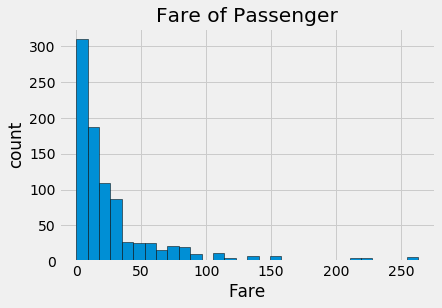

In [18]:
plt.style.use("fivethirtyeight")
plt.hist(titanic_train['Fare'].dropna(), edgecolor = 'k', bins = 30)
plt.title('Fare of Passenger')
plt.xlabel("Fare")
plt.ylabel('count')

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


(-0.005, 0.05612313887175992)

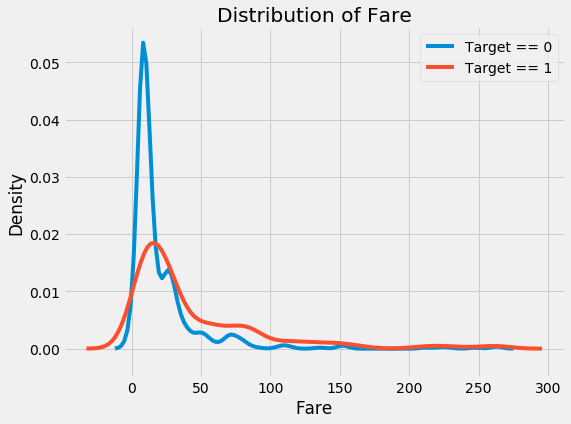

In [19]:
plt.figure(figsize = (8, 6))

sns.kdeplot(titanic_train.loc[titanic_train['Survived'] == 0, "Fare"], label = 'Target == 0')
sns.kdeplot(titanic_train.loc[titanic_train['Survived'] == 1, "Fare"], label = 'Target == 1')
plt.xlabel("Fare"); plt.ylabel("Density"); plt.title("Distribution of Fare"); plt.ylim(-0.005,)

In [20]:
fare_data = titanic_train[['Survived', 'Fare']]
fare_data['fare_block'] = pd.cut(fare_data['Fare'],bins = np.linspace(0,250,11))
fare_data.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Survived,Fare,fare_block
0,0,7.2500,"(0.0, 25.0]"
1,1,71.2833,"(50.0, 75.0]"
2,1,7.9250,"(0.0, 25.0]"
3,1,53.1000,"(50.0, 75.0]"
4,0,8.0500,"(0.0, 25.0]"
5,0,8.4583,"(0.0, 25.0]"
6,0,51.8625,"(50.0, 75.0]"
7,0,21.0750,"(0.0, 25.0]"
8,1,11.1333,"(0.0, 25.0]"
9,1,30.0708,"(25.0, 50.0]"


In [21]:
fare_groups = fare_data.groupby('fare_block').mean()
fare_groups

,Survived,Fare
fare_block,,
"(0.0, 25.0]",0.293358,10.961192
"(25.0, 50.0]",0.419540,31.175120
"(50.0, 75.0]",0.555556,60.097090
"(75.0, 100.0]",0.795455,82.492141
"(100.0, 125.0]",0.733333,112.933880
"(125.0, 150.0]",0.888889,137.360167
"(150.0, 175.0]",0.666667,155.146767
"(175.0, 200.0]",NaN,NaN
"(200.0, 225.0]",0.600000,213.458340


Text(0.5,1,'Survive by Fare Groups')

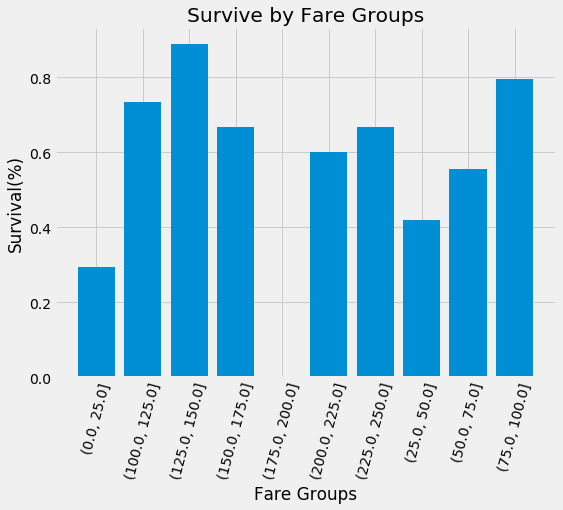

In [22]:
plt.figure(figsize=(8,6))
plt.bar(fare_groups.index.astype(str), fare_groups['Survived'])
plt.xticks(rotation = 75);plt.xlabel('Fare Groups'); plt.ylabel('Survival(%)')
plt.title('Survive by Fare Groups')

In [23]:
neg_data = titanic_train[['Survived', 'Sex', 'Pclass', 'Embarked_S', 'Age']]
corr_neg_data = neg_data.corr()
corr_neg_data

,Survived,Sex,Pclass,Embarked_S,Age
Survived,1.000000,-0.543351,-0.338481,-0.155660,-0.077221
Sex,-0.543351,1.000000,0.131900,0.125722,0.093254
Pclass,-0.338481,0.131900,1.000000,0.081720,-0.369226
Embarked_S,-0.155660,0.125722,0.081720,1.000000,-0.032523
Age,-0.077221,0.093254,-0.369226,-0.032523,1.000000


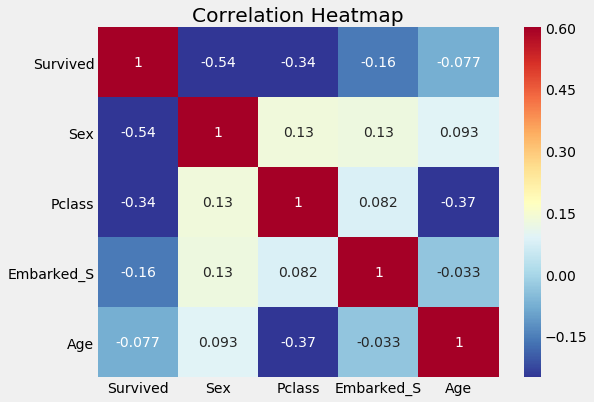

In [24]:
plt.figure(figsize = (8,6))
sns.heatmap(corr_neg_data, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title("Correlation Heatmap");

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


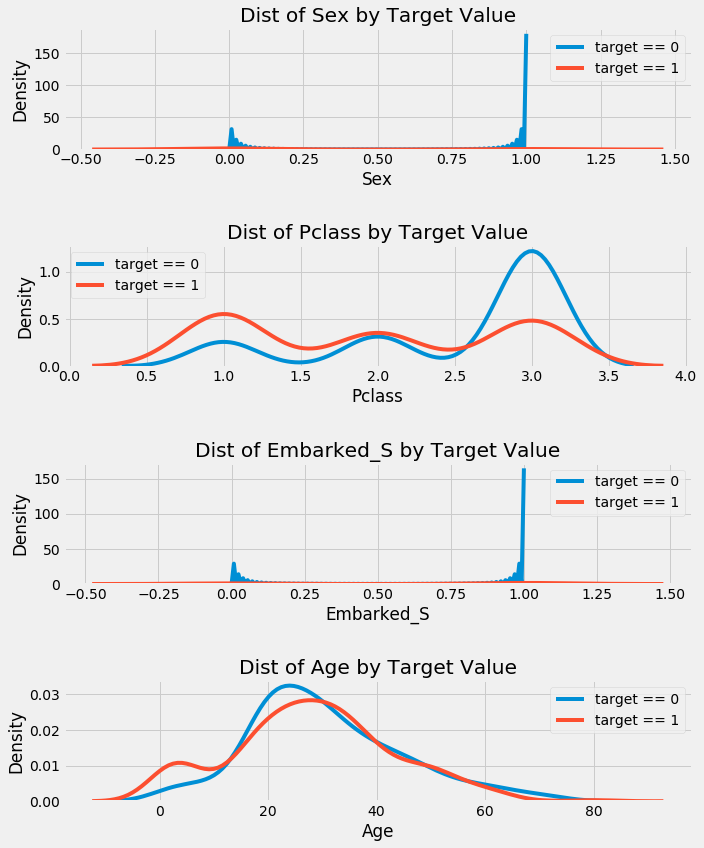

In [25]:
plt.figure(figsize = (10,12))
for i, source in enumerate(['Sex', 'Pclass', 'Embarked_S', 'Age']):
    plt.subplot(4, 1, i+1)
    sns.kdeplot(titanic_train.loc[titanic_train["Survived"] == 0, source], label = 'target == 0')
    sns.kdeplot(titanic_train.loc[titanic_train["Survived"] == 1, source], label = 'target == 1')

    plt.title("Dist of %s by Target Value" % source)
    plt.xlabel("%s" % source);plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [26]:
neg_data

,Survived,Sex,Pclass,Embarked_S,Age
0,0,1,3,1,22.0
1,1,0,1,0,38.0
2,1,0,3,1,26.0
3,1,0,1,1,35.0
4,0,1,3,1,35.0
5,0,1,3,0,NaN
6,0,1,1,1,54.0
7,0,1,3,1,2.0
8,1,0,3,1,27.0
9,1,0,2,0,14.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/anaconda3/lib/python3.6/site-packages/sta

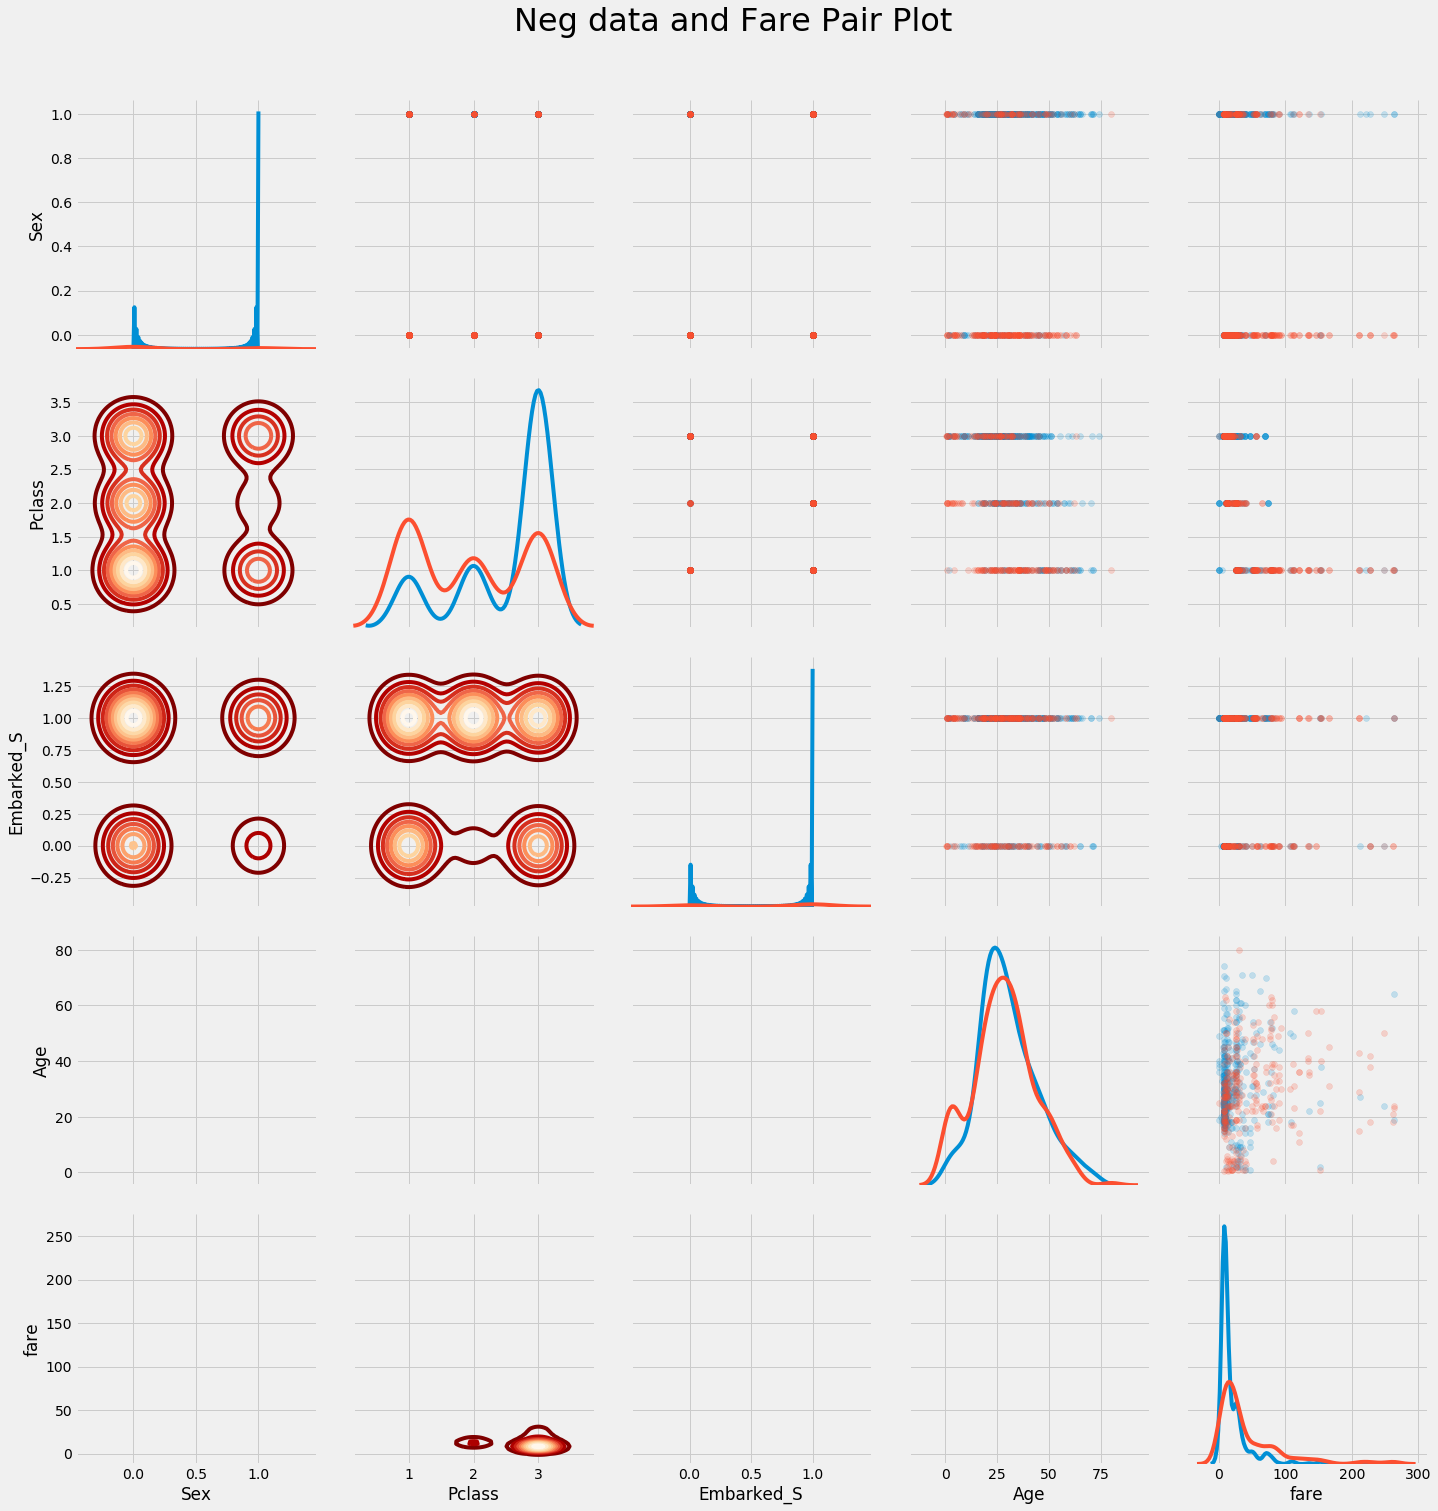

In [27]:
plot_data = neg_data
plot_data['fare'] = fare_data['Fare']

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
               xy(.2, .8), xycoords=ax.transAxes,
               size = 20)
    
grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey=False,
                   hue = 'Survived',
                   vars = [x for x in list(plot_data.columns) if x != 'Survived'])

grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);
plt.suptitle('Neg data and Fare Pair Plot', size =32, y = 1.05);

In [28]:
from sklearn.preprocessing import MinMaxScaler, Imputer

if 'Survived' in titanic_train:
    train = titanic_train.drop(columns = ['Survived'])
else:
    train = titanic_test.copy()

features = list(train.columns)
test = titanic_test.copy()
imputer = Imputer(strategy = "median")
scaler = MinMaxScaler(feature_range = (0, 1))
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)

Training data shape:  (891, 165)
Testing data shape:  (418, 165)


In [29]:
features = features[1:]
train = train[:, 1:]
test = test[:, 1:]

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 1)
log_reg.fit(train, train_labels)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
def logistic_accuracy(data, c):
    log_reg = LogisticRegression(C = c)
    log_reg.fit(train, train_labels)
    return print("The Accuracy of %s model in test set is %s" % 
                 ("Logistic Regression", str(sum(log_reg.predict(train) == train_labels) / len(train_labels))))

In [32]:
logistic_accuracy(train, 1)

The Accuracy of Logistic Regression model in test set is 0.8204264870931538


In [33]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
random_forest.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [34]:
feature_importance_values = random_forest.feature_importances_
feature_importance = pd.DataFrame({"feature": features, 'importance': feature_importance_values})
prediction = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [35]:
feature_importance.sort_values(by = 'importance', ascending = False)

,feature,importance
5,Fare,0.234966
1,Sex,0.234382
2,Age,0.222282
0,Pclass,0.072127
3,SibSp,0.040437
4,Parch,0.035904
162,Embarked_S,0.016610
160,Embarked_C,0.010574
161,Embarked_Q,0.006450
23,Ticket_1601,0.006025


In [36]:
import xgboost

In [37]:
xg = xgboost.DMatrix(train, label = train_labels)

In [38]:
model = xgboost.XGBClassifier(n_estimators=2, nthread=-1, seed=0)
model.fit(train, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1)

In [39]:
sum(model.predict(train) == train_labels) / len(train_labels)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8316498316498316

In [43]:
model.predict(test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [41]:
np.dot([[1,2],[1,2]], [2,1])

array([4, 4])